Python function is dynamic

# Unconstraint double pendulum

In [59]:
from sympy import *

In [2]:
init_printing()

In [3]:
frac = Rational

In [4]:
# unit vector
i = Matrix([1, 0])
j = Matrix([0, 1])

In [5]:
q1, q2 = var('q1:3')
dq1, dq2 = var('\dot{q}_1:3')
ddq1, ddq2 = var('\ddot{q}_1:3')
m1, m2 = var('m1:3')
l1, l2 = var('l1:3')
g, k, c, w= var('g k c w')

In [6]:
q = Matrix([q1, q2])
dq = Matrix([dq1, dq2])
z = Matrix([q1, q2, dq1, dq2])
dz = Matrix([dq1, dq2, ddq1, ddq2])

In [7]:
e1 = cos(q[0]) * (-j) + sin(q[0]) * (-i)
e2 = cos(q[0]+q[1]) * (-j) + sin(q[0]+q[1]) * (-i)

In [8]:
p1 = l1 * e1 
p2 = l2 * e2 + p1

In [9]:
dp1 = p1.jacobian(z) * dz
dp2 = p2.jacobian(z) * dz

In [10]:
T = frac(1, 2) * m1 * dp1.dot(dp1) + frac(1, 2) * m2 * dp2.dot(dp2)
U = m1 * g * p1[1] + m2 * g * p2[1]

In [11]:
D = Matrix([T]).jacobian(dq).jacobian(dq)
C = Matrix([T]).jacobian(dq).jacobian(q) * dq - Matrix([T]).jacobian(q).T
G = Matrix([U]).jacobian(q).T

In [12]:
D, C, G = simplify(D), simplify(C), simplify(G)

In [13]:
ddq = D.inv() * (-C - G)

In [14]:
params = [m1, m2, l1, l2, g]

In [15]:
ddq_np = lambdify(list(z) + params, ddq, modules=['numpy', 'sympy'])

In [16]:
import numpy as np
from scipy.integrate import odeint

In [17]:
def f(z, t, p):
    dz0, dz1 = z[2], z[3]
    dz2, dz3 = ddq_np(*(np.r_[z, p]))
    return np.array([dz0, dz1, dz2, dz3])

In [18]:
p0 = np.array([1, 1, 1, 1, 9.8])
#y0 = np.array([1, 0, 0, 0])
y0 = np.array([-1, -0.5, 0, 2])
t  = np.linspace(0, 10, 1000)
sol = odeint(f, y0, t, args=(p0,))

In [19]:
import matplotlib.pyplot as plt

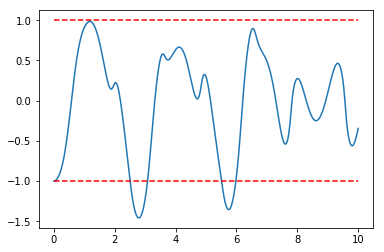

In [20]:
plt.plot(t, sol[:, 0])
plt.plot([0, 10], [-1, -1], 'r--')
plt.plot([0, 10], [ 1,  1], 'r--')
plt.show()

In [21]:
# kinematics
p1_np = lambdify(list(z) + params, p1)
p2_np = lambdify(list(z) + params, p2)

In [22]:
from matplotlib import animation, rc
from IPython.display import HTML

In [23]:
p0 = np.array([1, 1, 1, 1, 9.8])
fig, ax = plt.subplots(figsize=(6, 6))
plt.axis('equal')
plt.axis([-3, 3, -3, 3])

l, = ax.plot([], [], lw=2, linestyle='-', marker='o')
def init():
    l.set_data([], [])
    return (l,)
def animate(i):
    y = sol[i, :]
    p1 = p1_np(*np.r_[y, p0]).squeeze()
    p2 = p2_np(*np.r_[y, p0]).squeeze()
    l.set_data([0, p1[0], p2[0]], [0, p1[1], p2[1]])
    return (l,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=10, blit=True)
HTML(anim.to_html5_video())

# Constraint double pendulum

## Smoothed Step function

In [60]:
n = 1 / (1 + exp((k+1) / 0.01)) + 1 / (exp((1-k) / 0.01) + 1)

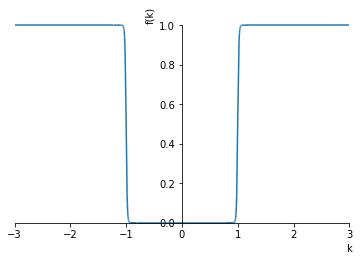

In [61]:
plot(n, (k, -3, 3))
plt.show()

In [26]:
fl = Matrix([0, 
             ( k * (1-q2) - c * dq2) /  (exp((1 - q2) / w) + 1) +
             (-k * (q2+1) - c * dq2) /  (exp((1 + q2) / w) + 1)])
ddq = D.inv() * (-C - G + fl)

In [27]:
params = [m1, m2, l1, l2, g, k, c, w]
# kinematics
p1_np = lambdify(list(z) + params, p1)
p2_np = lambdify(list(z) + params, p2)
fl_np = lambdify(list(z) + params, fl, 'sympy')

In [28]:
# test
p0 = np.array([1, 1, 1, 1, 9.8, 100, 10, 0.0001])
y_gen = lambda x: np.array([0, x, 0, 0])
print('q2={}, fl={}'.format(-1.1, fl_np(*np.r_[y_gen(-1.1), p0])))
print('q2={}, fl={}'.format(-0.9, fl_np(*np.r_[y_gen(-0.9), p0])))
print('q2={}, fl={}'.format( 0.9, fl_np(*np.r_[y_gen( 0.9), p0])))
print('q2={}, fl={}'.format( 1.1, fl_np(*np.r_[y_gen( 1.1), p0])))

q2=-1.1, fl=Matrix([[0], [10.0000000000000]])
q2=-0.9, fl=Matrix([[0], [-5.07595889755061e-434]])
q2=0.9, fl=Matrix([[0], [5.07595889755061e-434]])
q2=1.1, fl=Matrix([[0], [-10.0000000000000]])


In [29]:
ddq_np = lambdify(list(z) + params, ddq, modules=['numpy', 'sympy'])

In [38]:
T_np = lambdify(list(z) + params, T)
U_np = lambdify(list(z) + params, U)

In [45]:
int('33')

In [48]:
fig, axes = plt.subplots(3, 4, figsize=(12, 4))

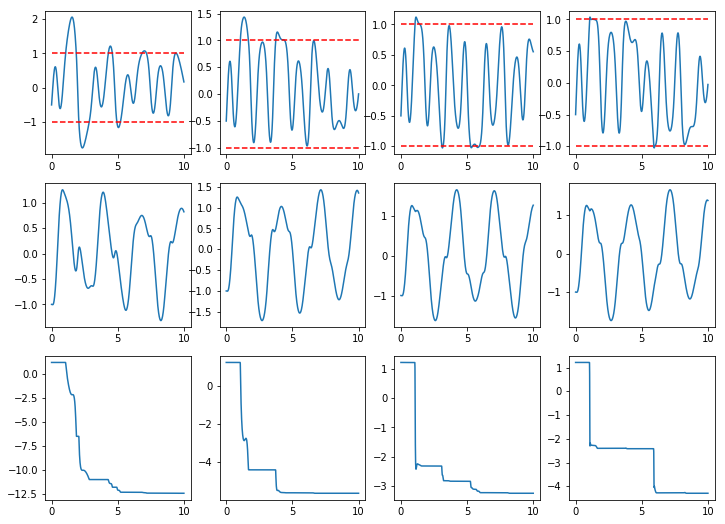

In [58]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
# ax2 = fig.add_subplot(132)
# ax3 = fig.add_subplot(133)
for i in range(4):
    param1 = np.array([1, 1, 1, 1, 9.8, 10**i, 10**(i/2), 0.01])
    y0 = np.array([-1, -0.5, 0, 5])
    t  = np.linspace(0, 10, 1000)
    sol = odeint(f, y0, t, args=(param1,))
    E = [T_np(*np.r_[sol[i, :], param1]) + U_np(*np.r_[sol[i, :], param1]) for i in range(len(sol))]
    axes[0, i].plot(t, sol[:, 1])
    # ax.plot(np.arange(0, 10, 0.01), sol[:, 3])
    axes[0, i].plot([0, 10], [-1, -1], 'r--')
    axes[0, i].plot([0, 10], [ 1,  1], 'r--')
    axes[1, i].plot(t, sol[:, 0])
    axes[2, i].plot(t, E)
    # ax.legend(['$q_2$', '$\dot{q}_2$'])
plt.show()

In [37]:
p0 = np.array([1, 1, 1, 1, 9.8, 100, 10, 0.01])
fig, ax = plt.subplots(figsize=(6, 6))
plt.axis('equal')
plt.axis([-3, 3, -3, 3])

l, = ax.plot([], [], lw=2, linestyle='-', marker='o')
def init():
    l.set_data([], [])
    return (l,)
def animate(i):
    y = sol[i, :]
    p1 = p1_np(*np.r_[y, p0]).squeeze()
    p2 = p2_np(*np.r_[y, p0]).squeeze()
    l.set_data([0, p1[0], p2[0]], [0, p1[1], p2[1]])
    return (l,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=10, blit=True)
HTML(anim.to_html5_video())